# Exercise 2

Design of a connection using nails, bolts and tooth-plates

In [1]:
import numpy as np
import handcalcs.render
from math import sqrt, pi

## Data

In [2]:
%%render
rho = 380 #kg/m3
k_mod = 0.8
gamma = 1.3

<IPython.core.display.Latex object>

In [3]:
%%render
N_G = 30 #𝑘𝑁
N_k = 70 #𝑘𝑁
N_d = 1.35 * N_G + 1.5 * N_k #𝑘𝑁

<IPython.core.display.Latex object>

The loading scenario involving only permanent loads is not critical in this case ($N_{d,II} = 67.5$ kN)

## <h1><center> Nailed solution </center></h1>

Considering 4.6 x130 mm nails. The distances $t_1$ and $t_2$ are worked out based on the dimensions of the mmebers to be connected.

In [4]:
%%render
t_1 = 80 #mm
t_2 = 130 - t_1 #mm
f_uk = 600 #MPa
d = 4.6 # mm

<IPython.core.display.Latex object>

Note that $t_2$ is larger than 8d (36. 8mm)

### Minimum distances

In [5]:
%%render
a_1 = 10*d #mm
a_2 = 5*d #mm
a_3t = 15*d #mm
a_4t = 5*d #mm

<IPython.core.display.Latex object>

The adopted distances are governed by practical considerations as well as, in the case of $a_1$ the requirement to have a large strength

In [6]:
%%render
a_1 = 65 #mm - 14 d see n_eff requirement
a_2 = 25 #mm
a_3t = 70 #mm
a_4t = 35 #mm

<IPython.core.display.Latex object>

### Strength calculations

In [7]:
%%render
M_yk = 0.3*f_uk*d**2.6 #Nmm
f_h1k = 0.082*rho*d**(-0.3)
f_h2k = f_h1k
beta = 1

<IPython.core.display.Latex object>

Load-carrying capacity per connector, wood-to-wood, single shear:

In [8]:
%%render
T = 0
R_IA = f_h1k*t_1*d #N
R_IB = f_h2k*t_2*d #N
R_IC = f_h1k*d*(t_1/(1+beta))*(sqrt(beta+2*beta**2*(1 +(t_2/t_1)+(t_2/t_1)**2)-beta**3*(t_2/t_1)**2)-beta*(1+(t_2/t_1))) + T #N
R_IIA = 1.05*(f_h1k*d*t_1)/(2+beta)*(sqrt(2*beta*(1+beta)+(4*beta*(2+beta)*M_yk)/(f_h1k*d*t_1**2))-beta) + T #N
R_IIB = 1.05*(f_h1k*d*t_2)/(2+beta)*(sqrt(2*beta*(1+beta)+(4*beta*(2+beta)*M_yk)/(f_h1k*d*t_2**2))-beta) + T #N
R_IIC = 1.15*sqrt((2*beta)/(1+beta))*sqrt(2*M_yk*f_h1k*d) + T #N
R_k = min(R_IA, R_IB, R_IC, R_IIA, R_IIB, R_IIC) #N

<IPython.core.display.Latex object>

In [9]:
%%render
R_d = R_k*k_mod/gamma #N

<IPython.core.display.Latex object>

### Number of fasteners

The number of nails is found considering n_eff = n for a_1 = 14d

In [10]:
%%render
n = N_d*1000/R_d/2

<IPython.core.display.Latex object>

78 nails

## <h1><center> Bolted solution </center></h1>

Considering M20 4.8 bolts whose dimensions will depend on the member thicknesses

In [11]:
%%render
t_1 = 80 #mm
t_2 = 120 #mm
f_uk = 400 #MPa
d = 20 # mm

<IPython.core.display.Latex object>

## Minimum distances

In [12]:
%%render
a_1 = 5*d #mm
a_2 = 4*d #mm
a_3t = 7*d #mm
a_4t = 3*d #mm

<IPython.core.display.Latex object>

The adopted distances are governed by practical considerations as well as, in the case of $a_1$ the requirement to have a large strength

In [13]:
%%render
a_1 = 230 #mm - see n_eff calcs
a_2 = 80 #mm
a_3t = 140 #mm
a_4t = 75 #mm

<IPython.core.display.Latex object>

However, it is not possible to accomodate the minimum required distnaces within the member dimensions:
    $a_2 + 2a_4 = 200 > 196$. Therefore, the width of the section is changed to 230 mm, that is why $a_{4t} = 75$ mm.

### Strength calculations

In [14]:
%%render
M_yk = 0.3*f_uk*d**2.6 #Nmm
f_h1k = 0.082*(1-0.01*d)*rho
f_h2k = f_h1k
beta = 1

<IPython.core.display.Latex object>

Load-carrying capacity per connector, wood-to-wood, single shear:

In [15]:
%%render
T = 0
R_IA = f_h1k*t_1*d #N
R_IB = 0.5*f_h2k*t_2*d #N
R_IIA = 1.05*(f_h1k*d*t_1)/(2+beta)*(sqrt(2*beta*(1+beta)+(4*beta*(2+beta)*M_yk)/(f_h1k*d*t_1**2))-beta) + T #N
R_IIC = 1.15*sqrt((2*beta)/(1+beta))*sqrt(2*M_yk*f_h1k*d) + T #N
R_k = min(R_IA, R_IB, R_IIA, R_IIC) #N

<IPython.core.display.Latex object>

In [16]:
%%render
R_d = R_k*k_mod/gamma #N

<IPython.core.display.Latex object>

### Number of fasteners

The number of bolts is decided, first by assuming that n_eff = n:

In [17]:
%%render
n = N_d*1000/R_d/2

<IPython.core.display.Latex object>

$\approx 7$ nails with 14d spacing. It is decided, therefore, to use 8 bolts in 2 rows of 4 each. So:

In [18]:
%%render
n = 8/2 #Calculations are performed per bolt row
n_eff = n**(0.9)*(a_1/(13*d))**(1/4)

<IPython.core.display.Latex object>

which leads to:

In [19]:
%%render
R_T = n_eff*R_d*2*2

<IPython.core.display.Latex object>

That is greater than N_d

## <h1><center> Tooth-plates solution </center></h1>

Considering we use the same bolts as in the previous calculations, together with 80 mm tood-plates, we have:

In [20]:
%%render
t_1 = 80 #mm
t_2 = 120 #mm
f_uk = 400 #MPa
d = 20 # mm
d_c = 80 # mm
h_e = 12 # mm

<IPython.core.display.Latex object>

## Minimum distances

In [21]:
%%render
a_1 = 1.5*d_c #mm
a_2 = 1.2*d_c #mm
a_3t = 2*d_c #mm
a_4t = 0.6*d_c #mm

<IPython.core.display.Latex object>

### Strength calculations

The capacity of each connector is composed of the capacity of the bolt (as determined before) and the capacity of the tooth-plate, caculated as:

In [22]:
%%render
k_1 = min(1, t_1/(3*h_e), t_2/(5*h_e))
k_2 = min(1, a_3t/(1.5*d_c))
k_3 = min(1.5, rho/350)
R_pk=25*k_1*k_2*k_3*d_c**1.5 #N

<IPython.core.display.Latex object>

Load-carrying capacity per connector:

In [23]:
%%render
R_kT = R_k + R_pk #N
R_d = k_mod*R_kT/1000/gamma #kN

<IPython.core.display.Latex object>

### Number of fasteners

The number of fasteners assuming n_eff = n (hence providing distances accordingly):

In [24]:
%%render
n = N_d/R_d/2

<IPython.core.display.Latex object>

$\approx 4$ tooth-plate connectors in a single bolt row.

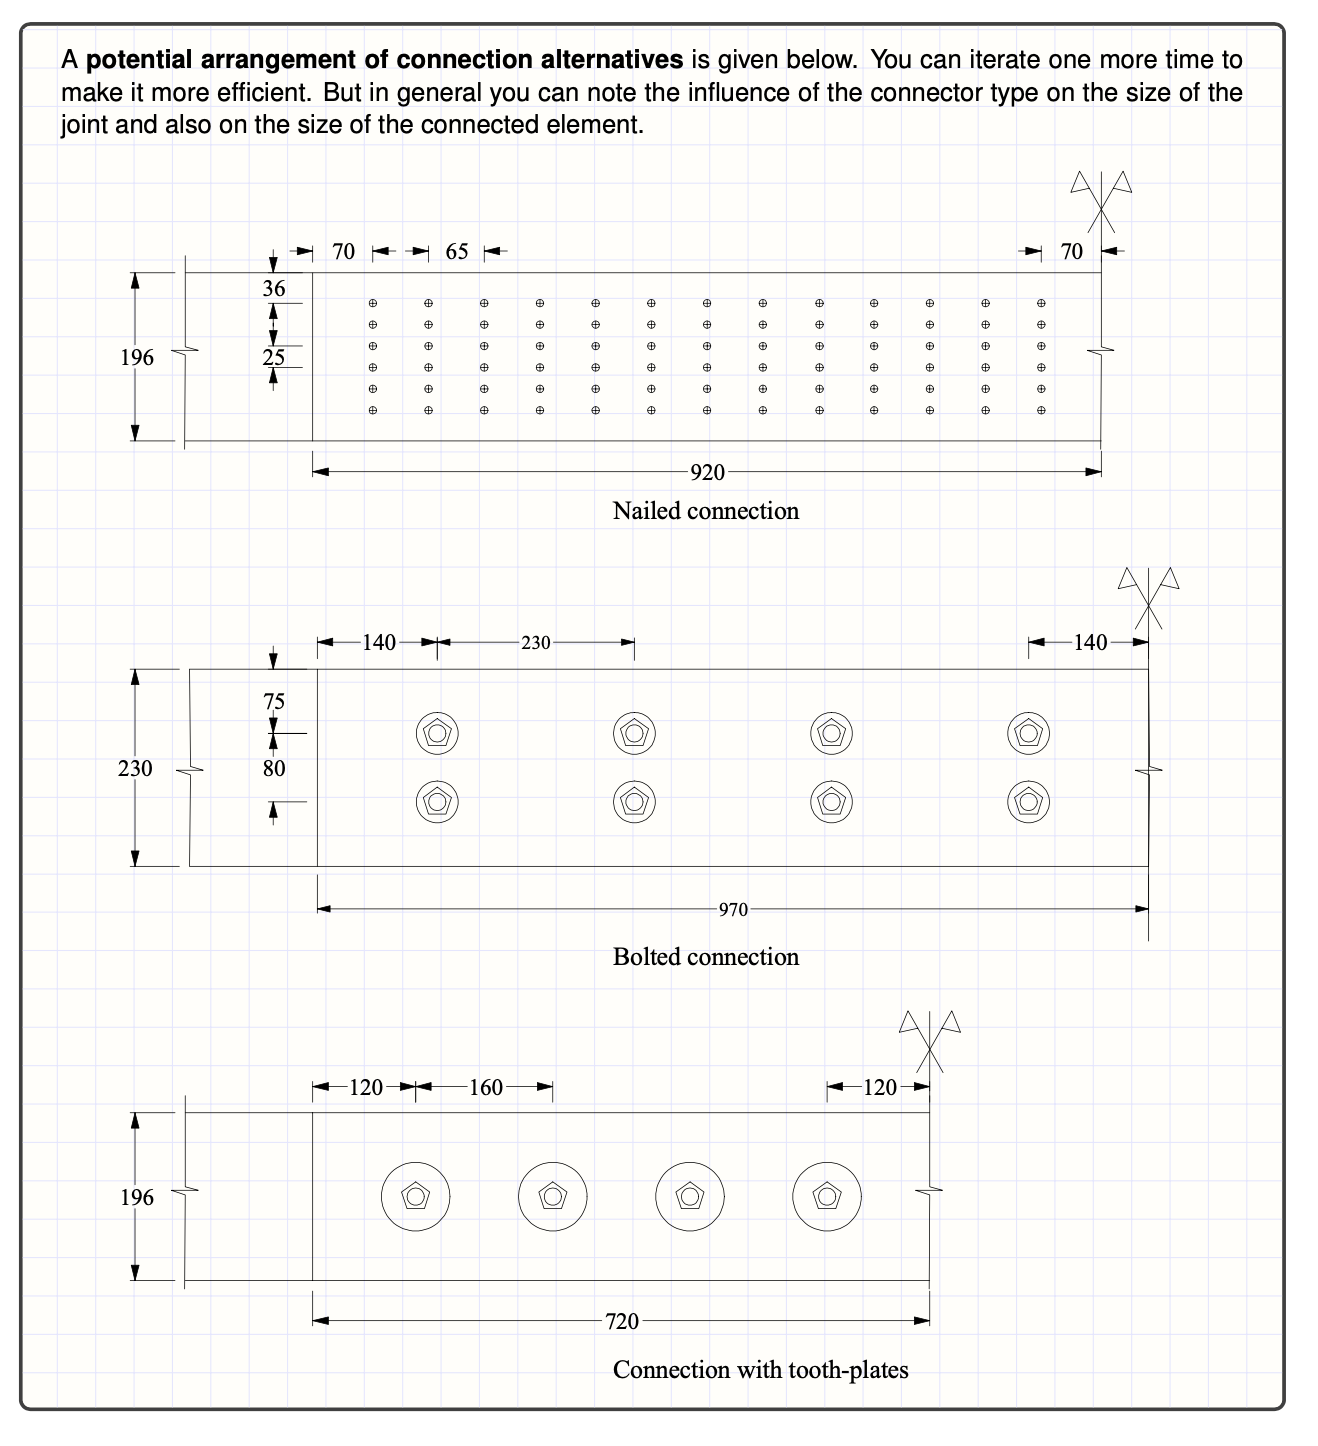